In [1]:
#Read from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('SuperMarioBros.3.csv', sep = ',', encoding = 'latin-1')
del df['URL']

print(df)

        Run ID   User ID         User Name              Category  Hours  \
0     wzpr08mq  qxkog680            Svenne  Any% (No Wrong Warp)    0.0   
1     pyd53wmn  qxkog680            Svenne         Any% Warpless    0.0   
2     nz151gye     ERROR     [se]Frezy_man  Any% (No Wrong Warp)    0.0   
3     1zqw35zl  qjn2k4jm           AndrewG  Any% (No Wrong Warp)    0.0   
4     9mrke2yq     ERROR  MitchFlowerPower  Any% (No Wrong Warp)    0.0   
...        ...       ...               ...                   ...    ...   
2843  yv98n06z  8rpdnlgj          FoxyLove                  Any%    0.0   
2844  z09n0vjz  jn3kle2x      Jackieplays5                  100%    0.0   
2845  y8r078nm  8v51v0vj        PastaMasta                  100%    0.0   
2846  zq4elnrm  x7q3gyv8          AliceHK8         Any% Warpless    1.0   
2847  m752rvez  x35vryej            Rh4kor         Any% Warpless    1.0   

      Minutes  Seconds Platform ID Platform Name  Verified        Date  
0        13.0   43.000    

In [2]:
#Clean data

df = df.loc[(df['Category'] == 'Any% Warpless') & (df['Verified'] == 'verified') & (df['Date'].notnull())]
df = df.rename({'User Name': 'userName'}, axis=1)
df = df.sort_values(["Date"])
del df['Verified']
del df['Run ID']
del df['User ID']

totalSeconds = []

for x in range(len(df)):
    seconds = 0.0
    seconds += (df.iloc[x].Hours * 3600) + (df.iloc[x].Minutes * 60) + (df.iloc[x].Seconds)
    totalSeconds.append(seconds)

df['TimeSeconds'] = totalSeconds
df = df[['userName', 'Category', 'Hours', 'Minutes', 'Seconds', 'TimeSeconds', 'Platform Name', 'Date']]

print(df)

              userName       Category  Hours  Minutes  Seconds  TimeSeconds  \
385   mitchflowerpower  Any% Warpless    0.0     55.0     47.0       3347.0   
384   mitchflowerpower  Any% Warpless    0.0     55.0      4.0       3304.0   
1485            [jp]bh  Any% Warpless    0.0     54.0     46.0       3286.0   
387              Kirua  Any% Warpless    0.0     54.0     34.0       3274.0   
383   mitchflowerpower  Any% Warpless    0.0     53.0     53.0       3233.0   
...                ...            ...    ...      ...      ...          ...   
2823         Overswarm  Any% Warpless    1.0      3.0     54.0       3834.0   
2828          FoxyLove  Any% Warpless    1.0     20.0     15.0       4815.0   
2830         Kongkrete  Any% Warpless    2.0     26.0      9.0       8769.0   
2829        TuttiPullo  Any% Warpless    1.0      4.0     59.0       3899.0   
2837            Mondii  Any% Warpless    1.0     11.0     47.0       4307.0   

     Platform Name        Date  
385          WiiVC

              userName       Category  Hours  Minutes  Seconds  TimeSeconds  \
385   mitchflowerpower  Any% Warpless    0.0     55.0     47.0       3347.0   
384   mitchflowerpower  Any% Warpless    0.0     55.0      4.0       3304.0   
1485            [jp]bh  Any% Warpless    0.0     54.0     46.0       3286.0   
387              Kirua  Any% Warpless    0.0     54.0     34.0       3274.0   
383   mitchflowerpower  Any% Warpless    0.0     53.0     53.0       3233.0   
382              Kirua  Any% Warpless    0.0     53.0     41.0       3221.0   
381              Kirua  Any% Warpless    0.0     53.0     34.0       3214.0   
380              Kirua  Any% Warpless    0.0     53.0     28.0       3208.0   
379              Kirua  Any% Warpless    0.0     53.0      2.0       3182.0   
378   mitchflowerpower  Any% Warpless    0.0     52.0     59.0       3179.0   
377   mitchflowerpower  Any% Warpless    0.0     52.0     59.0       3179.0   
376              Kirua  Any% Warpless    0.0     52.

Text(0.5, 1.0, 'Super Mario Bros. 3 Any% Warpless World Record Progression')

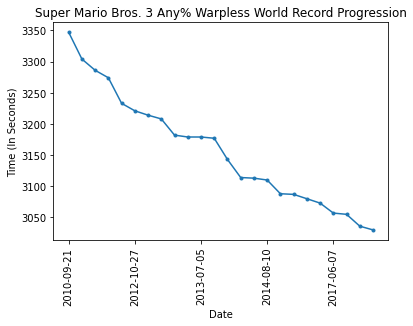

In [4]:
#Find World Record Progression

worldRecords = []
minTime = df.iloc[0].TimeSeconds

for x in range(len(df)):
    if df.iloc[x].TimeSeconds <= minTime:
        worldRecords.append(df.iloc[x])
        minTime = df.iloc[x].TimeSeconds

wrdf = pd.DataFrame(worldRecords)
print(wrdf)

wrdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Super Mario Bros. 3 Any% Warpless World Record Progression")

Number of improvements: 137
Number of same times: 90
Total runners: 227
         UserName  Fastest   First  PercentImprovement
113      gamercal   3579.0  3579.0           -0.000000
139        dm1184   3867.0  3867.0           -0.000000
140   smartalec24   3871.0  3871.0           -0.000000
142       GTAce99   3879.0  3879.0           -0.000000
148       Drako93   3984.0  3984.0           -0.000000
..            ...      ...     ...                 ...
141  KingRhodesTn   3877.0  6610.0           41.346445
59   HUmanMustard   3304.0  5892.0           43.923965
150       Picante   3999.0  7250.0           44.841379
101  SuperMegaDav   3521.0  7165.0           50.858339
41         esmo88   3239.0  7762.0           58.271064

[227 rows x 4 columns]


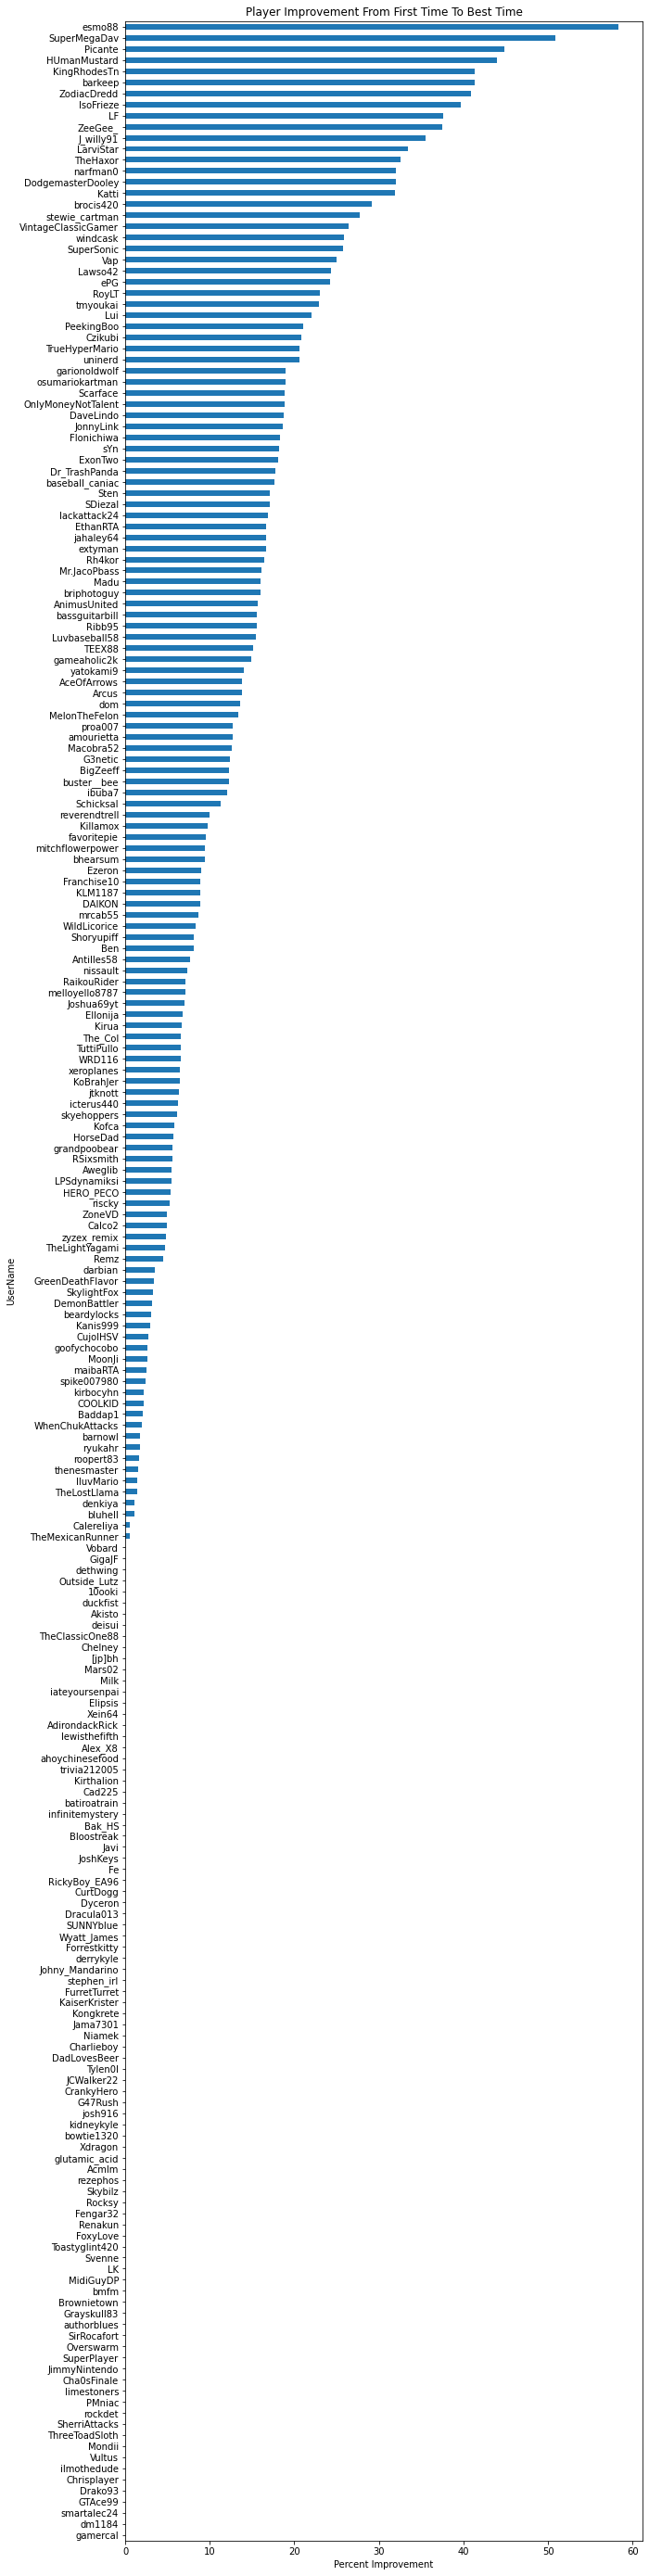

In [5]:
#Print Leadboard

rankingsFirst = df.sort_values(["Hours", "Minutes", "Seconds"])
rankingsFirst = rankingsFirst.drop_duplicates(subset = "userName")

rankingsLast = df.sort_values(["Date"])
rankingsLast = rankingsLast.drop_duplicates(subset = "userName")

quad = []

for x in range (len(rankingsFirst)):
    for y in range (len(rankingsLast)):
        if rankingsFirst.iloc[x].userName == rankingsLast.iloc[y].userName:
            fastest = rankingsFirst.iloc[x].TimeSeconds
            first = rankingsLast.iloc[y].TimeSeconds
            increase = (fastest - first) / first * 100
            increase = -increase
            quad.append((rankingsFirst.iloc[x].userName, fastest, first, increase))

count = 0
same = 0

for x in quad:
    if (x[1] < x[2]):
        count += 1
    elif (x[1] == x[2]):
        same += 1;
        
print("Number of improvements: " + str(count))
print("Number of same times: " + str(same))
print("Total runners: " + str(len(quad)))

improvementdf =  pd.DataFrame(quad, columns = ['UserName', 'Fastest', 'First', 'PercentImprovement'])
improvementdf = improvementdf.sort_values(["PercentImprovement"])
improvementdf.plot(kind = "barh", x = "UserName", y = "PercentImprovement", figsize = (10,50), legend = False)
plt.title("Player Improvement From First Time To Best Time")
plt.xlabel("Percent Improvement")
print(improvementdf)

              userName       Category  Hours  Minutes  Seconds  TimeSeconds  \
385   mitchflowerpower  Any% Warpless    0.0     55.0     47.0       3347.0   
384   mitchflowerpower  Any% Warpless    0.0     55.0      4.0       3304.0   
383   mitchflowerpower  Any% Warpless    0.0     53.0     53.0       3233.0   
378   mitchflowerpower  Any% Warpless    0.0     52.0     59.0       3179.0   
377   mitchflowerpower  Any% Warpless    0.0     52.0     59.0       3179.0   
375   mitchflowerpower  Any% Warpless    0.0     52.0     23.0       3143.0   
945   mitchflowerpower  Any% Warpless    0.0     51.0     54.0       3114.0   
95    mitchflowerpower  Any% Warpless    0.0     51.0     28.0       3088.0   
725   mitchflowerpower  Any% Warpless    0.0     51.0     14.0       3074.0   
1217  mitchflowerpower  Any% Warpless    0.0     51.0      2.0       3062.0   
1268  mitchflowerpower  Any% Warpless    0.0     50.0     55.0       3055.0   
1822  mitchflowerpower  Any% Warpless    0.0     50.

Text(0.5, 1.0, "IluvMario's Progression")

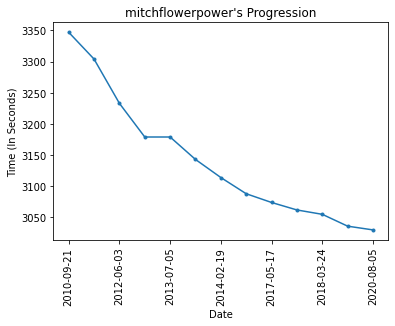

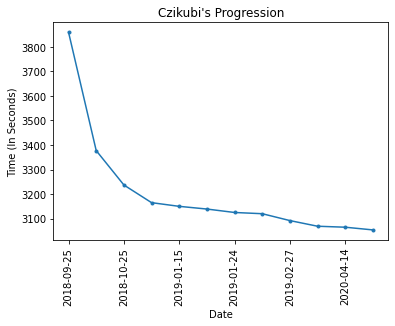

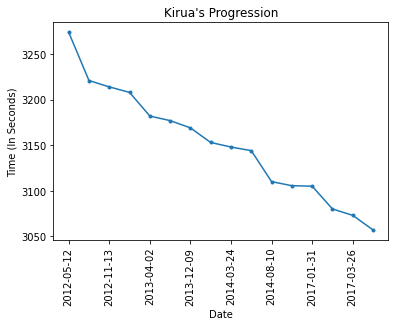

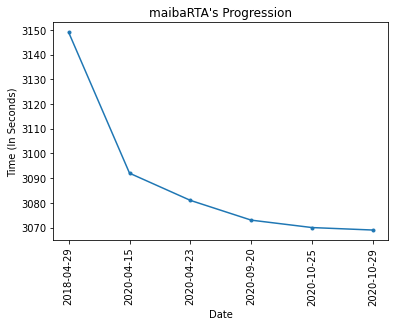

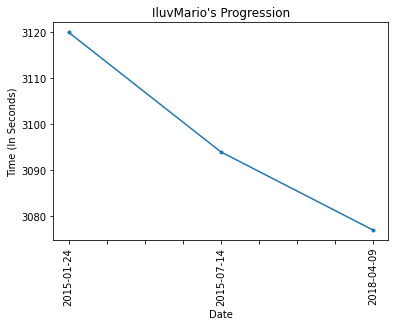

In [6]:
#Graph 5 Fastest Players

wrhdf = df.loc[df['userName'] == 'mitchflowerpower']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("mitchflowerpower's Progression")

wrhdf = df.loc[df['userName'] == 'Czikubi']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Czikubi's Progression")

wrhdf = df.loc[df['userName'] == 'Kirua']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Kirua's Progression")

wrhdf = df.loc[df['userName'] == 'maibaRTA']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("maibaRTA's Progression")

wrhdf = df.loc[df['userName'] == 'IluvMario']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("IluvMario's Progression")

Text(0.5, 1.0, 'Super Mario World Platform Distribution')

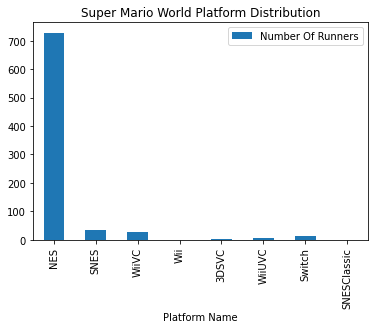

In [7]:
SNESCount = np.count_nonzero(df['Platform Name']=='SNES')
switchCount = np.count_nonzero(df['Platform Name']=='Switch')
wiiVCCount = np.count_nonzero(df['Platform Name']=='WiiVC')
ds3Count = np.count_nonzero(df['Platform Name']=='3DSVC')
wiiUVCCount = np.count_nonzero(df['Platform Name']=='WiiUVC')
SNESCCount = np.count_nonzero(df['Platform Name']=='SNESClassic')
NESCount = np.count_nonzero(df['Platform Name']=='NES')
wiiCount = np.count_nonzero(df['Platform Name']=='Wii')

platformsArray = ([ ['NES', NESCount], ['SNES', SNESCount], ['WiiVC', wiiVCCount], ['Wii', wiiCount], ['3DSVC', ds3Count], ['WiiUVC', wiiUVCCount], ['Switch', switchCount], ['SNESClassic', SNESCCount]])
platformdf = pd.DataFrame(data = platformsArray, columns = ['Platform Name', 'Number Of Runners'])

platformdf.plot(kind = 'bar', x='Platform Name', y='Number Of Runners', legend = True)
plt.title("Super Mario World Platform Distribution")

Text(0.5, 1.0, 'Super Mario Bros. 3 Quantity of Runs by Year')

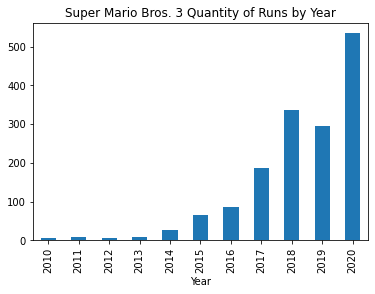

In [8]:
count2010 = np.count_nonzero(df['Date'] < '2011-01-01')
count2011 = np.count_nonzero(df['Date'] < '2012-01-01') - count2010
count2012 = np.count_nonzero(df['Date'] < '2013-01-01') - count2011
count2013 = np.count_nonzero(df['Date'] < '2014-01-01') - count2012
count2014 = np.count_nonzero(df['Date'] < '2015-01-01') - count2013
count2015 = np.count_nonzero(df['Date'] < '2016-01-01') - count2014
count2016 = np.count_nonzero(df['Date'] < '2017-01-01') - count2015
count2017 = np.count_nonzero(df['Date'] < '2018-01-01') - count2016
count2018 = np.count_nonzero(df['Date'] < '2019-01-01') - count2017
count2019 = np.count_nonzero(df['Date'] < '2020-01-01') - count2018
count2020 = np.count_nonzero(df['Date']) - count2019

monthsArray = ([ ['2010', count2012], ['2011', count2013], ['2012', count2012], ['2013', count2013], ['2014', count2014], ['2015', count2015], ['2016', count2016], ['2017', count2017], ['2018', count2018], ['2019', count2019], ['2020', count2020]])
monthsdf = pd.DataFrame(data = monthsArray, columns = ['Year', 'Number of Runs Submitted'])

monthsdf.plot(kind = 'bar', x = 'Year', y='Number of Runs Submitted', legend = False)
plt.title("Super Mario Bros. 3 Quantity of Runs by Year")